In [1]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime
import seaborn as sns 
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime
from single_data_processing import SingleAssetTI


[*********************100%***********************]  1 of 1 completed


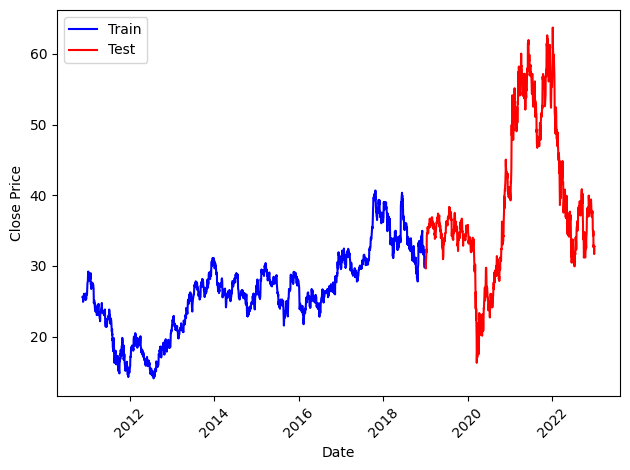

In [4]:
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
period ="train"
ticker = 'GM'
data = SingleAssetTI(ticker, start_date, end_date,2019)
data.data_preprocess()
train_data = data.train_data    
val_data = data.test_data

Testing K values: [2, 4, 6, 8, 10, 12]
Testing K = 2...
Running ring
Generation 1: Best fitness = 1.2599680247598422  Average Fitness = 1.2532488094214997
Generation 2: Best fitness = 1.2599680247598422  Average Fitness = 1.2588481555367852
Generation 3: Best fitness = 1.2599680247598422  Average Fitness = 1.2599680247598424
Generation 4: Best fitness = 1.2599680247598422  Average Fitness = 1.2588481555367852
Generation 5: Best fitness = 1.2599680247598422  Average Fitness = 1.2588481555367852
Generation 6: Best fitness = 1.2599680247598422  Average Fitness = 1.2599680247598424
Generation 7: Best fitness = 1.2599680247598422  Average Fitness = 1.2599680247598424
Generation 8: Best fitness = 1.2599680247598422  Average Fitness = 1.257728286313728
Generation 9: Best fitness = 1.2599680247598422  Average Fitness = 1.2599680247598424
Generation 10: Best fitness = 1.2599680247598422  Average Fitness = 1.2588171418140603
Island 0 Migration - Left 9 - Right 1
Island 1 Migration - Left 0 - Rig

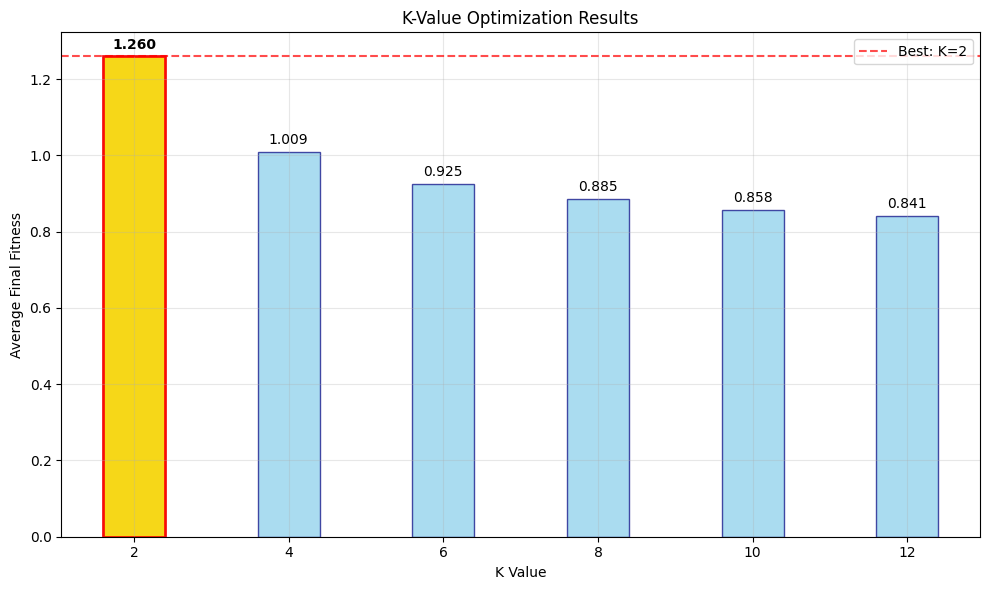


All results:
👑 K =  2: 1.2596
   K =  4: 1.0092
   K =  6: 0.9250
   K =  8: 0.8850
   K = 10: 0.8577
   K = 12: 0.8415

Recommendation: Use K = 2


In [7]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

strategies = data.strategies
current_train = train_data
current_test = val_data
pSize = 30
num_iter = 20
Ks = list(range(2, 13, 2))
num_runs = 10

# Store results
results = []
fitness_values = []

print(f"Testing K values: {Ks}")

for k in Ks:
    print(f"Testing K = {k}...")
    
    final_values = []  # Store only final fitness values for each run
    
    for run in range(num_runs):
        gtsp = IslandGGA(
            data=current_train,
            K=k,
            num_islands=10,
            m_iter=10,
            num_iter=50,
            pSize=150,
            strategies=strategies,
            evolve_strategy='ring'
        )
        
        gtsp.evolve()
        
        # Get only the final fitness value
        final_fitness = gtsp.convergence_values[-1]
        final_values.append(final_fitness)
        
        # Store for CSV
        results.append({
            'k_value': k,
            'run': run,
            'final_fitness': final_fitness
        })
    
    # Calculate average final performance for this K
    avg_final = np.mean(final_values)
    fitness_values.append(avg_final)
    
    print(f"  K = {k}: Average final fitness = {avg_final:.4f}")

# Save results to CSV
df = pd.DataFrame(results)
df.to_csv('results/k_results.csv', index=False)

# Find best K
best_k_idx = np.argmax(fitness_values)
best_k = Ks[best_k_idx]
best_fitness = fitness_values[best_k_idx]

print(f"\n🏆 BEST K VALUE: {best_k}")
print(f"   Average final fitness: {best_fitness:.4f}")

# Simple plot
plt.figure(figsize=(10, 6))
plt.bar(Ks, fitness_values, alpha=0.7, color='skyblue', edgecolor='navy')
plt.axhline(y=best_fitness, color='red', linestyle='--', alpha=0.7, label=f'Best: K={best_k}')

# Highlight best K
plt.bar(best_k, best_fitness, alpha=0.9, color='gold', edgecolor='red', linewidth=2)

plt.xlabel('K Value')
plt.ylabel('Average Final Fitness')
plt.title('K-Value Optimization Results')
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels on bars
for i, (k, fitness) in enumerate(zip(Ks, fitness_values)):
    plt.text(k, fitness + max(fitness_values)*0.01, f'{fitness:.3f}', 
             ha='center', va='bottom', fontweight='bold' if k == best_k else 'normal')

plt.tight_layout()
plt.savefig('results/k_optimization.png', dpi=300, bbox_inches='tight')
plt.show()

# Print simple summary
print(f"\nAll results:")
for k, fitness in zip(Ks, fitness_values):
    marker = "👑" if k == best_k else "  "
    print(f"{marker} K = {k:2d}: {fitness:.4f}")

print(f"\nRecommendation: Use K = {best_k}")